# Загрузка модели YoloV5

In [1]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [2]:
# git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -r requirements.txt  # install

/usr/src/app/pirojojo/yolov5
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


# Загрузка датасета

In [3]:
%pip install -q roboflow

^C
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.


In [4]:
import os 
import torch
import random
from IPython.display import Image

In [5]:
from roboflow import Roboflow
rf = Roboflow(api_key="WFKBZeJ6sU6HC3JuGB6M")
project = rf.workspace("codev").project("codev")
dataset = project.version(3).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


KeyboardInterrupt: 

# Обучение модели
### Размер входного изображения 640, fl_gamma = 1.5, веса модели сохраняются каждую вторую эпоху

In [1]:
%cd /usr/src/app/pirojojo/yolov5
!python train.py --img 640 --batch 128 --epochs 300 --weights yolov5s.pt --data Codev-3/data.yaml  --cfg 'models/yolov5s.yaml' --hyp 'data/hyps/hyp.scratch-high.yaml' --save-period 2

/usr/src/app/pirojojo/yolov5
train: weights=yolov5s.pt, cfg=models/yolov5s.yaml, data=Codev-3/data.yaml, hyp=data/hyps/hyp.scratch-high.yaml, epochs=300, batch_size=128, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=2, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 5 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5 🚀 v7.0-172-gc3c1304 Python-3.8.10 torch-1.13.1+cu117 CUDA:0 (Tesla V100-SXM2-32GB, 32511MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.

# Результаты обучения

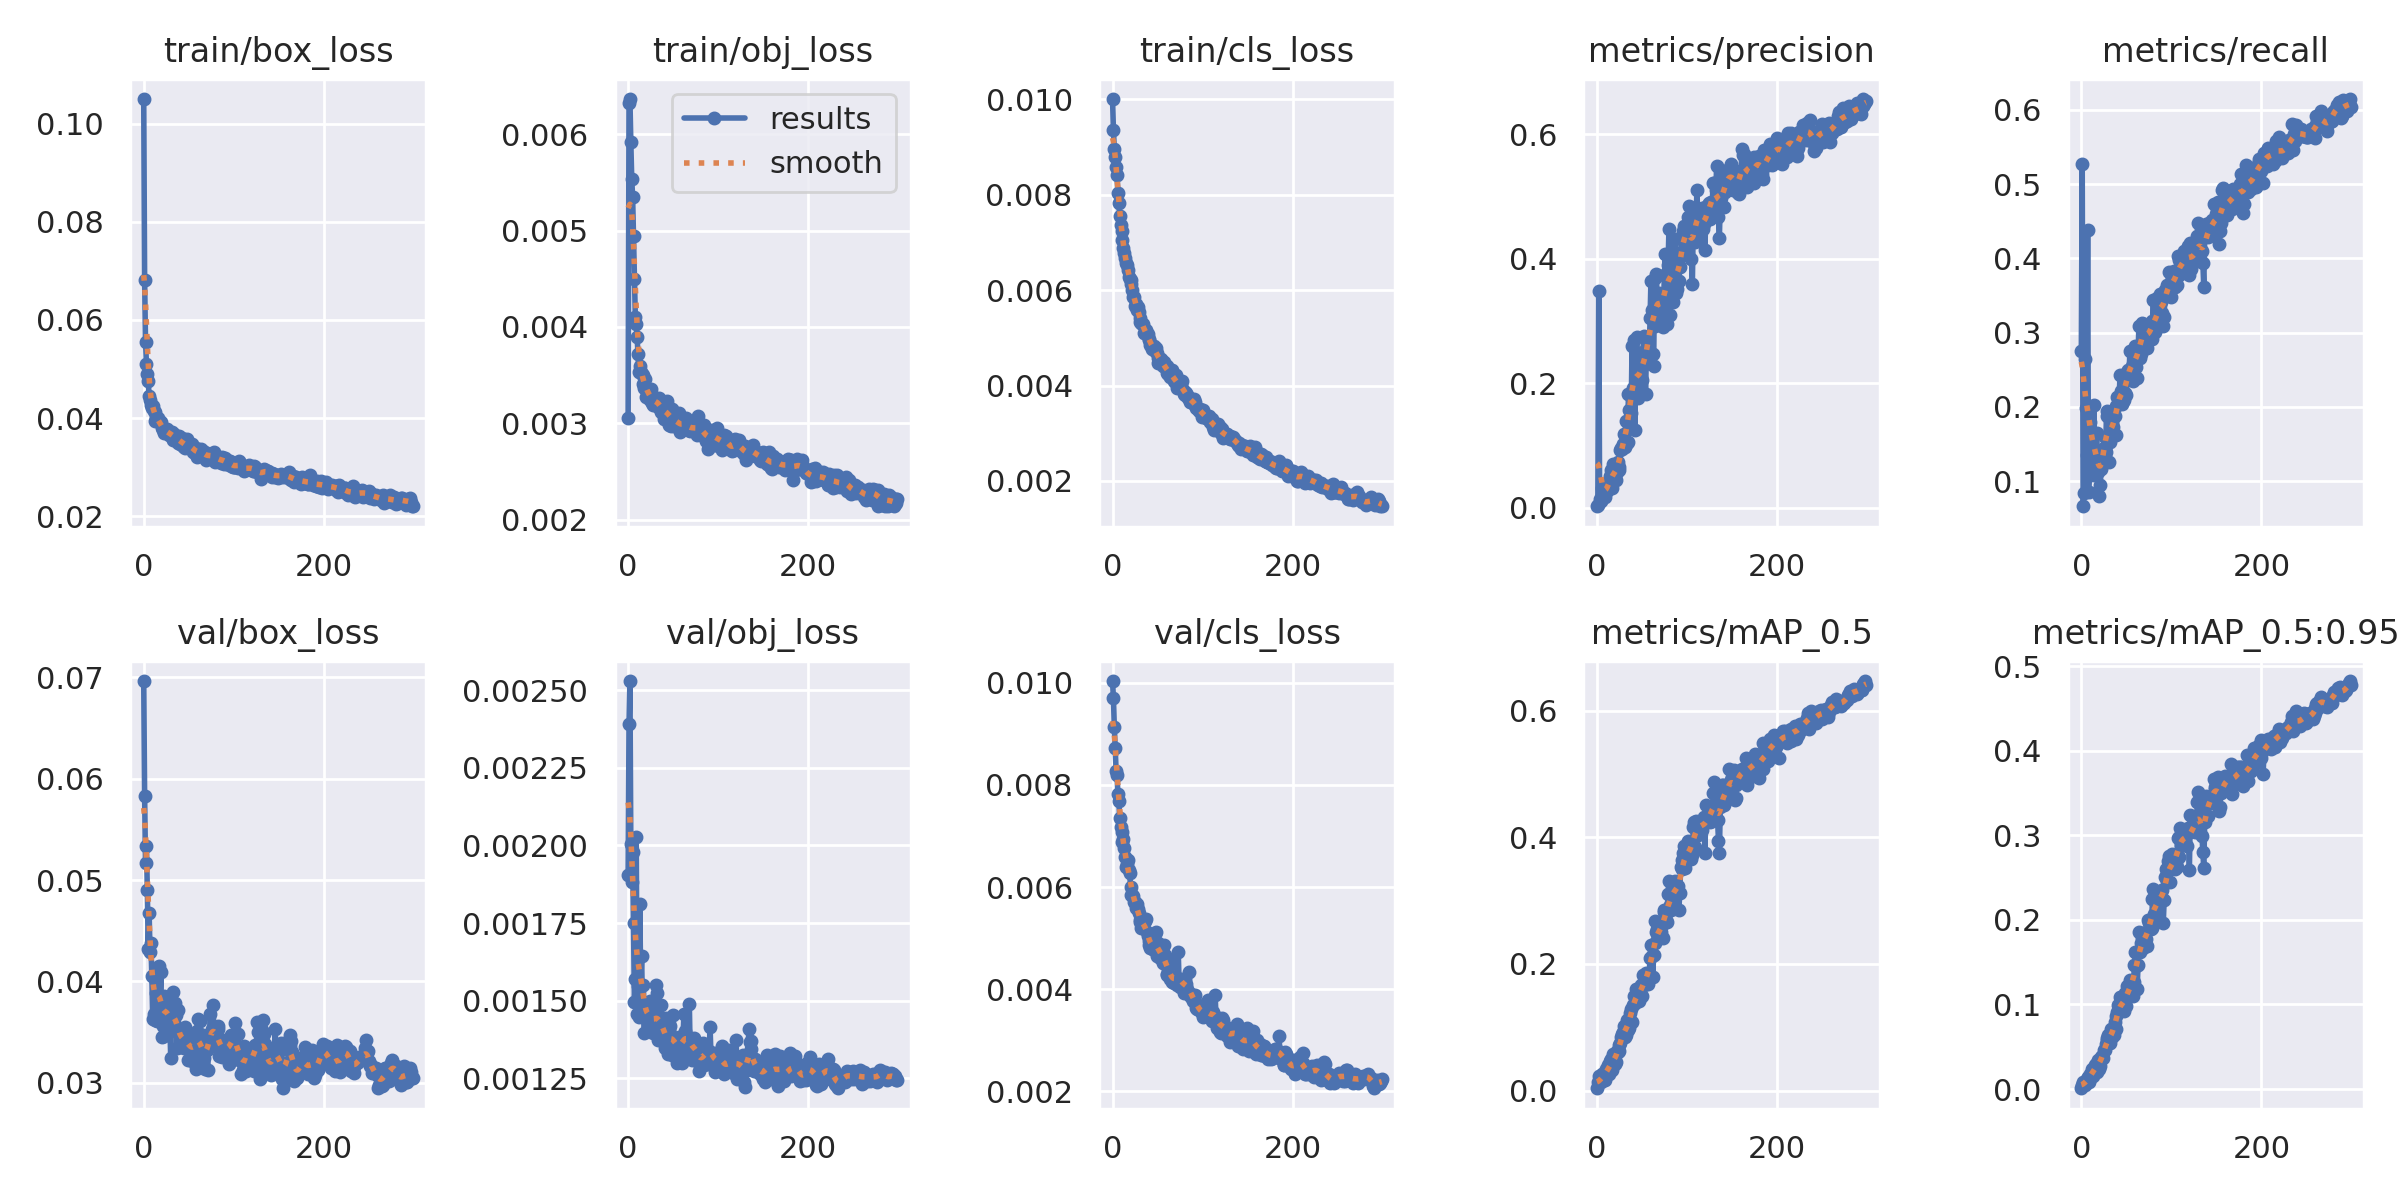

In [2]:
from IPython.display import Image
Image(filename='runs/train/exp/results.png', width=1000)

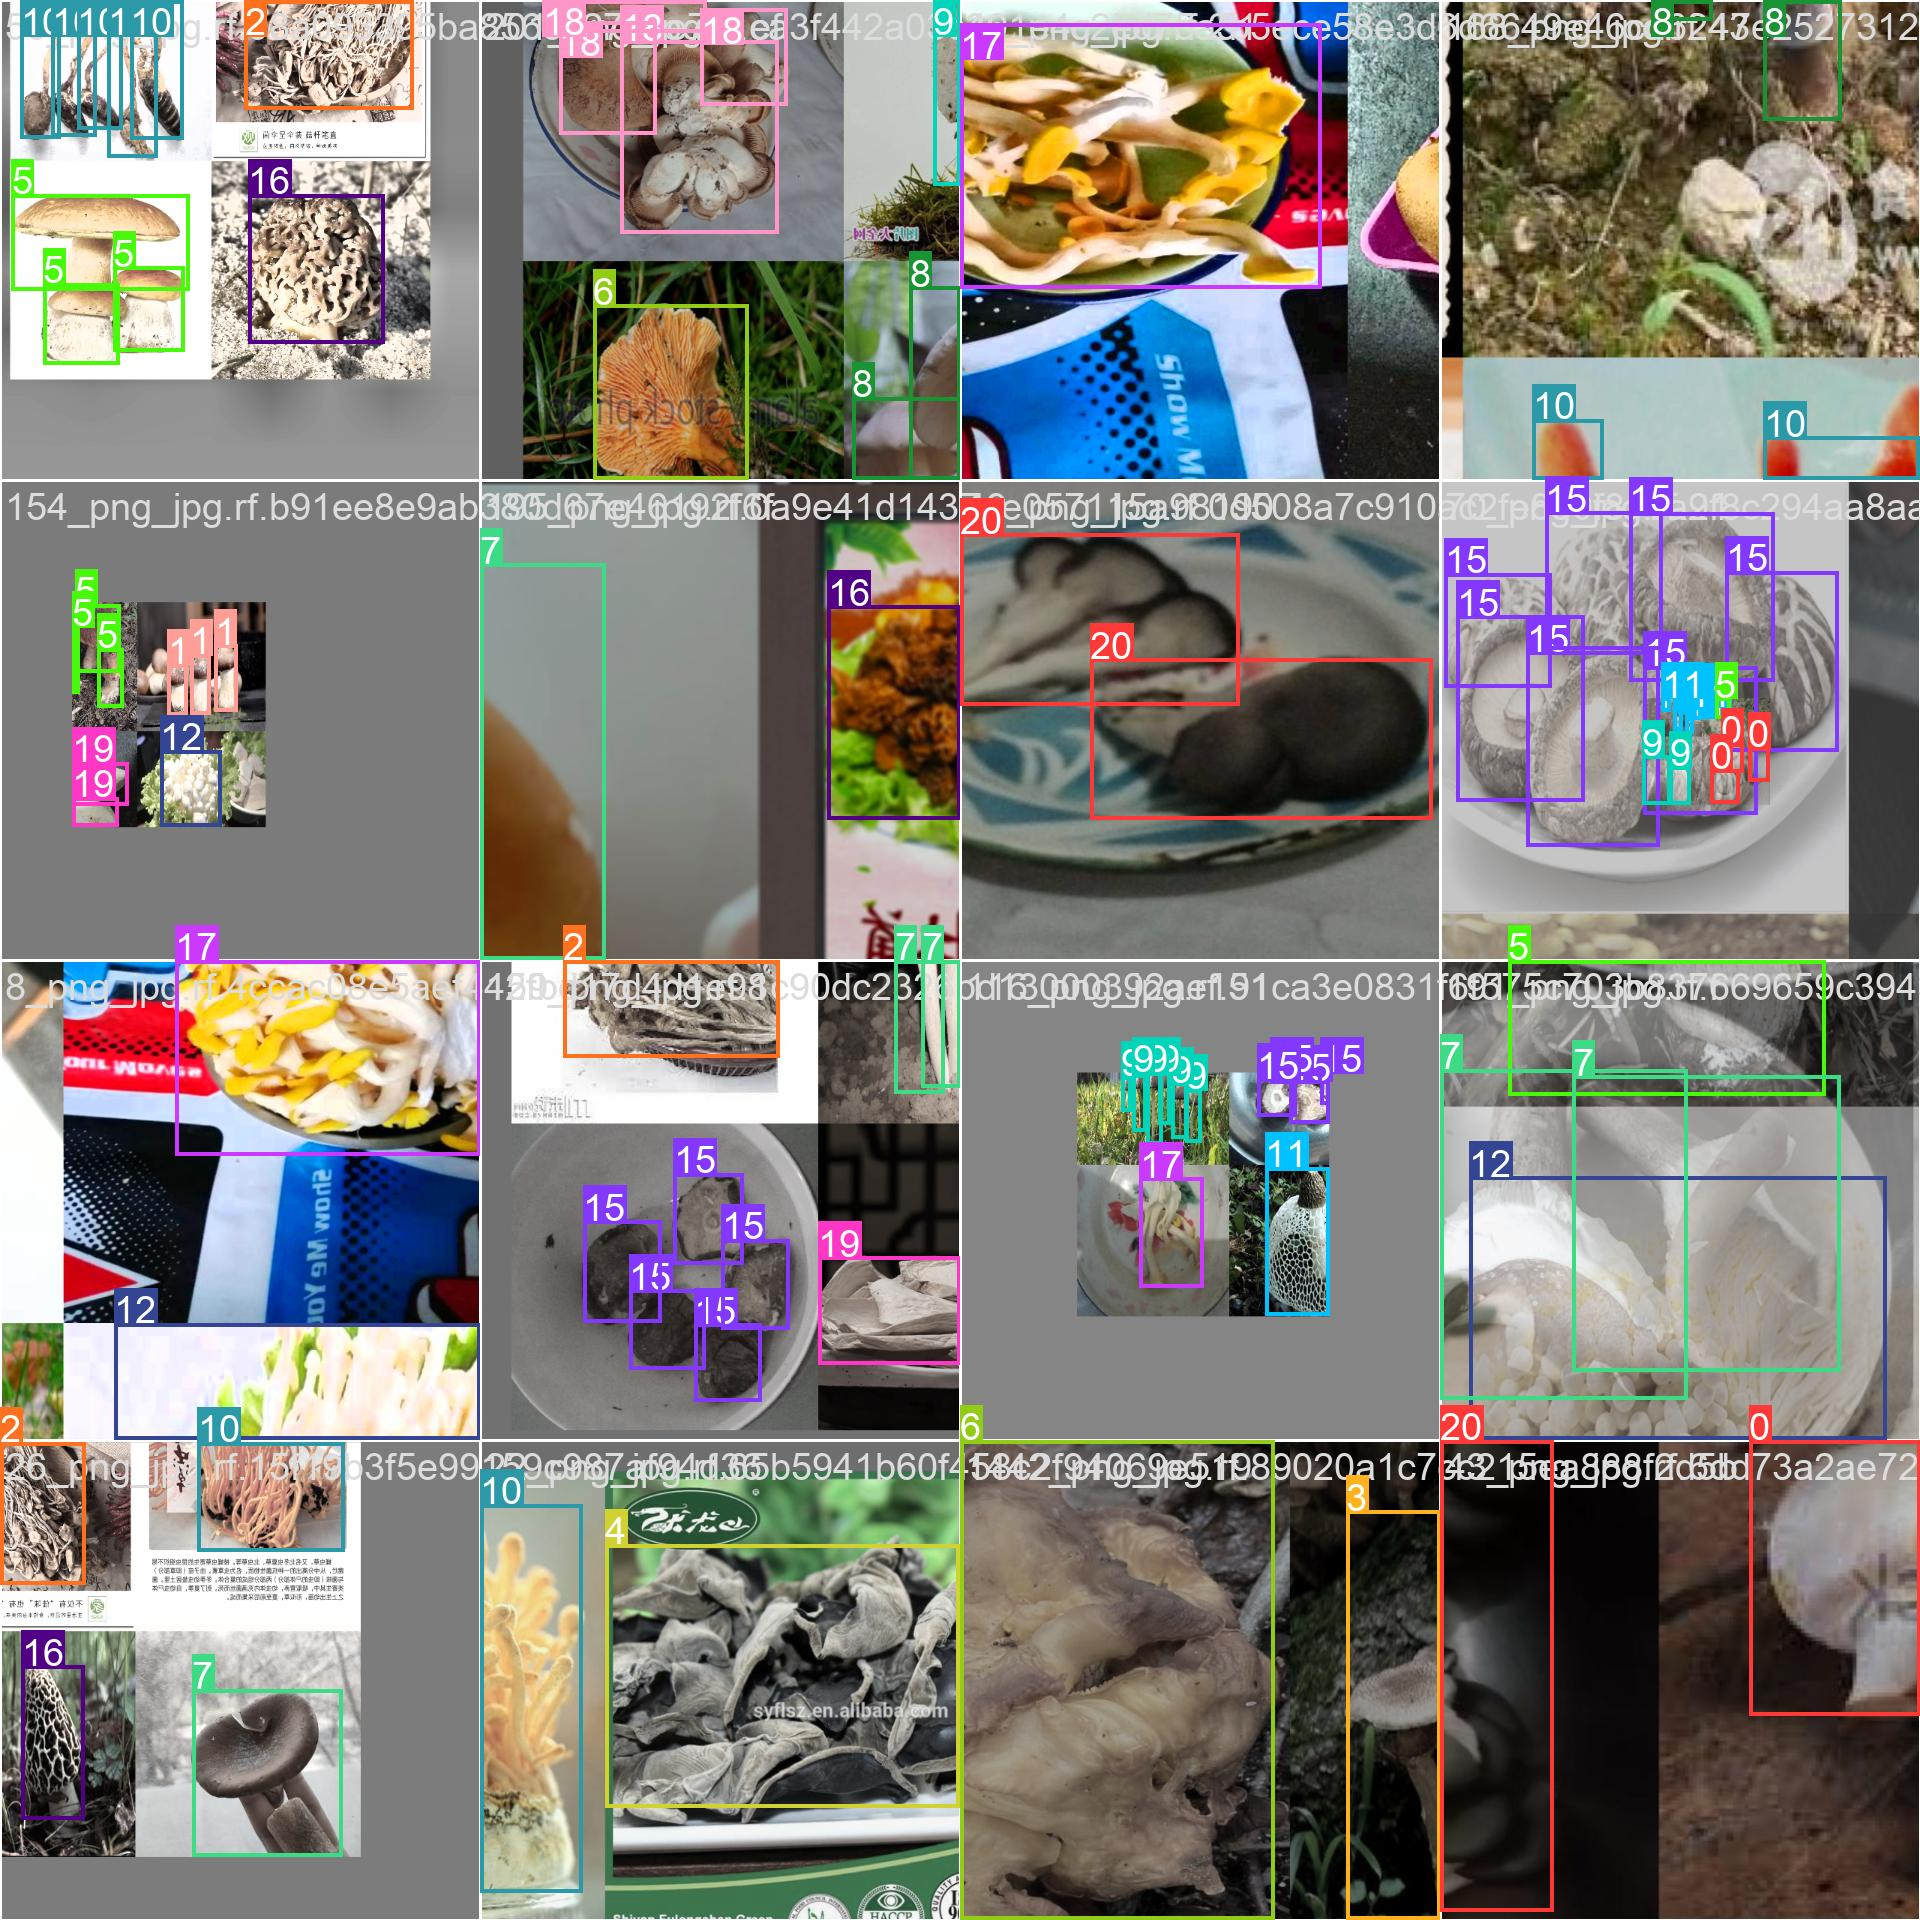

In [3]:
Image(filename='runs/train/exp/train_batch1.jpg', width=1000)

# Зависимость метрики модели от размера входного изображения

In [1]:
# %cd /usr/src/app/pirojojo/yolov5
# import torch 
# import pandas as pd
# BASE_DIR = 'runs/train/exp'
# size_of_image = [64, 128, 256, 512, 640, 1280]
# map05_for_size = []
# map05_095_for_size = []
# num_of_yolo = 0
# for i in range(7):
#     if i == 0:
#         df = pd.read_csv(BASE_DIR + '/results.csv')
#     if i == 1:
#         continue
#     if i > 1:
#         df = pd.read_csv(BASE_DIR + str(i) + '/results.csv')
#     map05_for_size.append(df.iloc[149]['     metrics/mAP_0.5'])
#     map05_095_for_size.append(df.iloc[149]['metrics/mAP_0.5:0.95'])
# df = pd.DataFrame(list(zip(size_of_image, map05_for_size, map05_095_for_size)), columns = ['size', 'map05', 'mAP05_095'])
# df.to_csv('/usr/src/app/pirojojo/investigation.csv', index='True')

/usr/src/app/pirojojo/yolov5


<AxesSubplot: xlabel='size'>

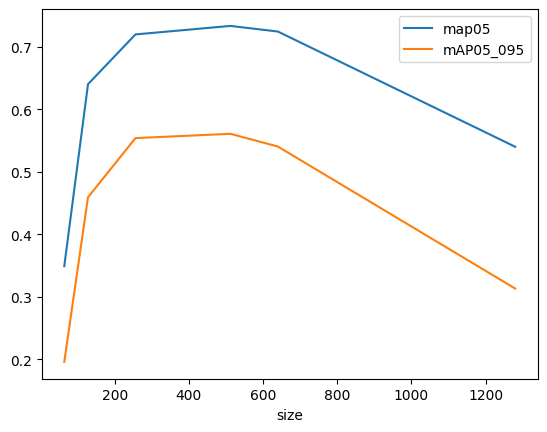

In [17]:
import matplotlib.pyplot as plt
result = pd.read_csv('/usr/src/app/pirojojo/investigation.csv')
result.plot(x="size", y=["map05", "mAP05_095"])

# Прогон валидации с весами минимального obj_loss и максимального obj_loss(после его падения)

In [2]:
!cd yolov5

### Беру нужные номера эпох

In [23]:
import pandas as pd
df = pd.read_csv('runs/train/exp/results.csv')
df_res = df[df['               epoch'] % 2 == 0]
id_min_obj_loss = df_res['      train/obj_loss'].idxmin()
df_for_max = df_res.loc[id_min_obj_loss:]
id_max_obj_loss = df_res['      train/obj_loss'].idxmax()
print(id_min_obj_loss)
print(id_max_obj_loss + id_min_obj_loss)

# list(df_res)
# df_for_max.head

282
284


### Прогон валидации с весами минимального obj_loss

In [25]:
!python val.py --weights runs/train/exp/weights/epoch282.pt --img 640 --data Codev-3/data.yaml 

val: data=Codev-3/data.yaml, weights=['runs/train/exp/weights/epoch282.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-172-gc3c1304 Python-3.8.10 torch-1.13.1+cu117 CUDA:0 (Tesla V100-SXM2-32GB, 32511MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7066762 parameters, 0 gradients, 15.9 GFLOPs
val: Scanning /usr/src/app/pirojojo/yolov5/Codev-3/valid/labels.cache... 798 ima
                 Class     Images  Instances          P          R      mAP50   
Mean confidence objective classifer:  0.015198792
                   all        798       1801      0.623      0.601      0.627      0.469
     Agaricus bisporus        798        105      0.725      0.714      0.721      0.592
Agaricus blazei Murill        798         66      0.437

### Прогон валидации с весами максимального obj_loss (после его падения)

In [26]:
!python val.py --weights runs/train/exp/weights/epoch284.pt --img 640 --data Codev-3/data.yaml 

val: data=Codev-3/data.yaml, weights=['runs/train/exp/weights/epoch284.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-172-gc3c1304 Python-3.8.10 torch-1.13.1+cu117 CUDA:0 (Tesla V100-SXM2-32GB, 32511MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7066762 parameters, 0 gradients, 15.9 GFLOPs
val: Scanning /usr/src/app/pirojojo/yolov5/Codev-3/valid/labels.cache... 798 ima
                 Class     Images  Instances          P          R      mAP50   
Mean confidence objective classifer:  0.01496029
                   all        798       1801      0.637      0.605      0.627      0.471
     Agaricus bisporus        798        105      0.726      0.743      0.747      0.615
Agaricus blazei Murill        798         66      0.381 

# Тестирование модели

In [27]:
!python detect.py --weights runs/train/exp/weights/best.pt --source Codev-3/test/images

detect: weights=['runs/train/exp/weights/best.pt'], source=Codev-3/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-172-gc3c1304 Python-3.8.10 torch-1.13.1+cu117 CUDA:0 (Tesla V100-SXM2-32GB, 32511MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7066762 parameters, 0 gradients, 15.9 GFLOPs
image 1/827 /usr/src/app/pirojojo/yolov5/Codev-3/test/images/000001-6-_png_jpg.rf.51004e755392395df7d7c1f5ccf2fe1e.jpg: 640x640 4 Lentinus edodess, 4.0ms
image 2/827 /usr/src/app/pirojojo/yolov5/Codev-3/test/images/000001_png_jpg.rf.4d3d767009e83a095c80febb0755d7b4.jpg: 640x640 5 Lentinus edodess, 3.9ms
image 3/827 /usr/src/app/pi

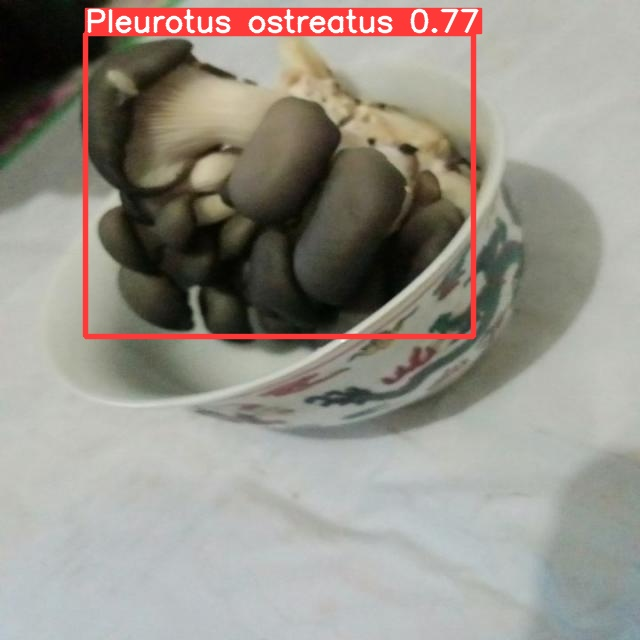

In [28]:
Image(filename='runs/detect/exp/114_png_jpg.rf.1851087bba737b544328a8e185007cfc.jpg', width=1000)

In [5]:
#%cd /usr/src/app/pirojojo
# %rm -r exp2
# %rm -r detect train val
%rm -r /usr/src/app/pirojojo/pirojojo/Dataset_for_2_lab